<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/src/RandomForestClassifier_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Impor Pustaka (Library Import)**

In [1]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Pemuatan Dataset dari Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           classification_report, confusion_matrix, ConfusionMatrixDisplay,
                           roc_auc_score, roc_curve)

# Visualisasi Decision Tree
from sklearn.tree import export_graphviz
import graphviz

## **2. Load data dan Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan memuat dataset dan melakukan beberapa langkah eksplorasi data awal untuk memahami karakteristik data yang kita miliki.

### **2.1 Memuat Dataset**

Dataset diunduh langsung dari Kaggle Hub menggunakan pustaka kagglehub.


In [2]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  "winequality-red.csv"
)

display(df.head())

<ipython-input-2-92150c9e3da5>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 98.6k/98.6k [00:00<00:00, 847kB/s]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **2.2 Pemeriksaan Awal Data**

Kita akan melihat informasi dasar dari dataset seperti tipe data setiap kolom, jumlah entri, dan ringkasan statistiknya.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Cek data duplikasi
print(f"Jumlah data duplikasi : {df.duplicated().sum()}")

# Cek jumlah data sebelum drop duplikasi
print(f"Data sebelum drop duplikasi : {len(df)}")

# Drop data duplikasi
df.drop_duplicates(inplace=True)

# Data setelah drop duplikasi
print(f"Data setelah drop duplikasi : {len(df)}")

Jumlah data duplikasi : 240
Data sebelum drop duplikasi : 1599
Data setelah drop duplikasi : 1359


In [ ]:
# Melihat kolom null
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Melihat ringkasan statistik data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


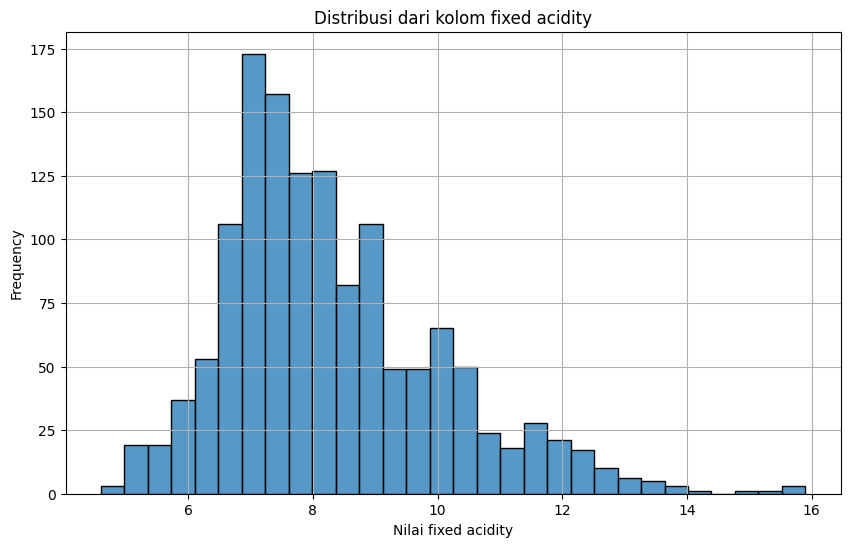

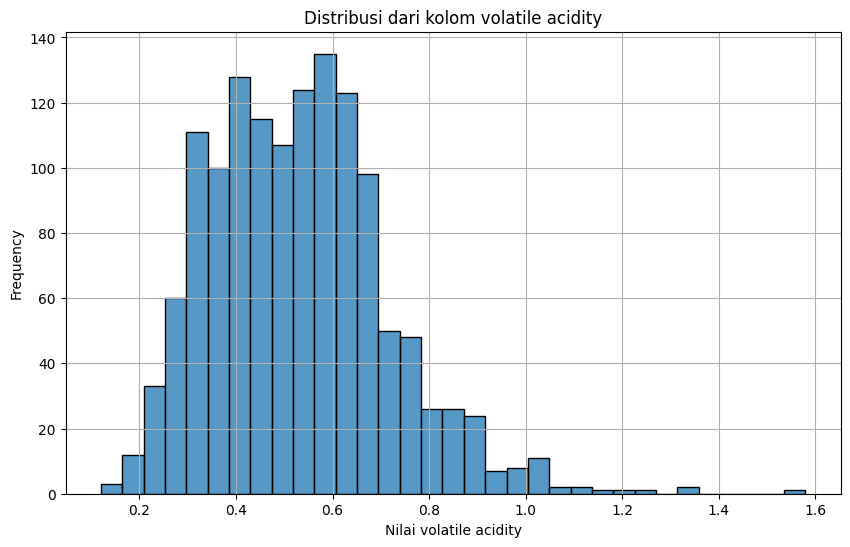

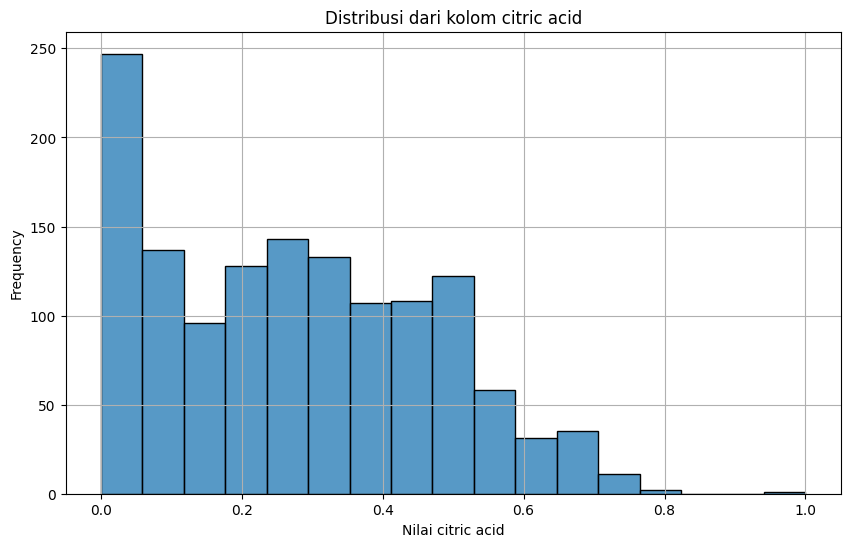

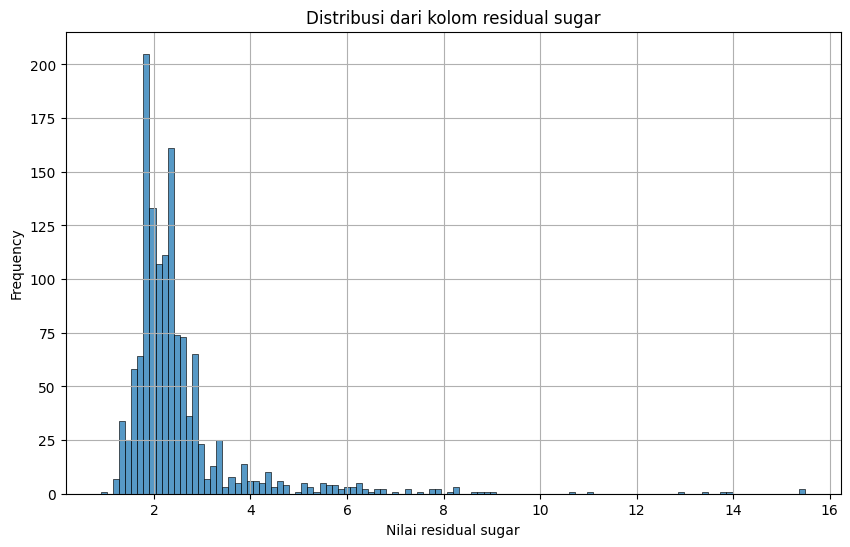

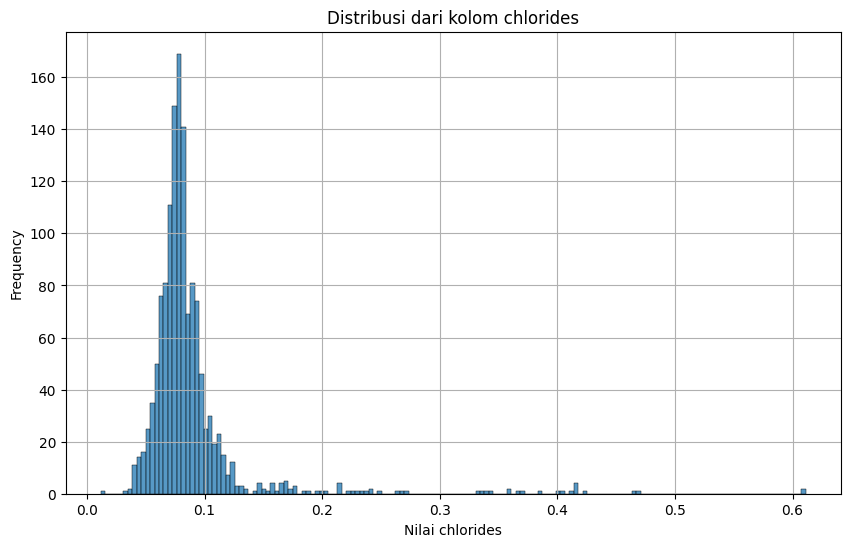

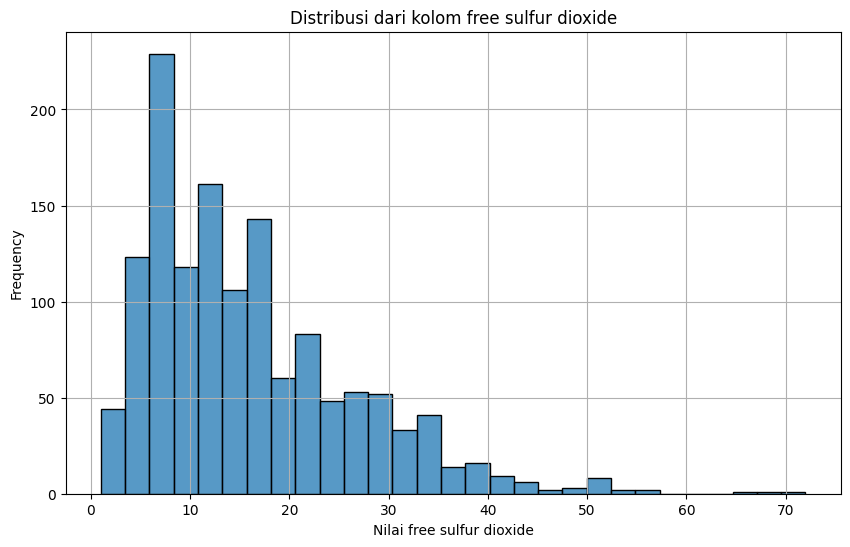

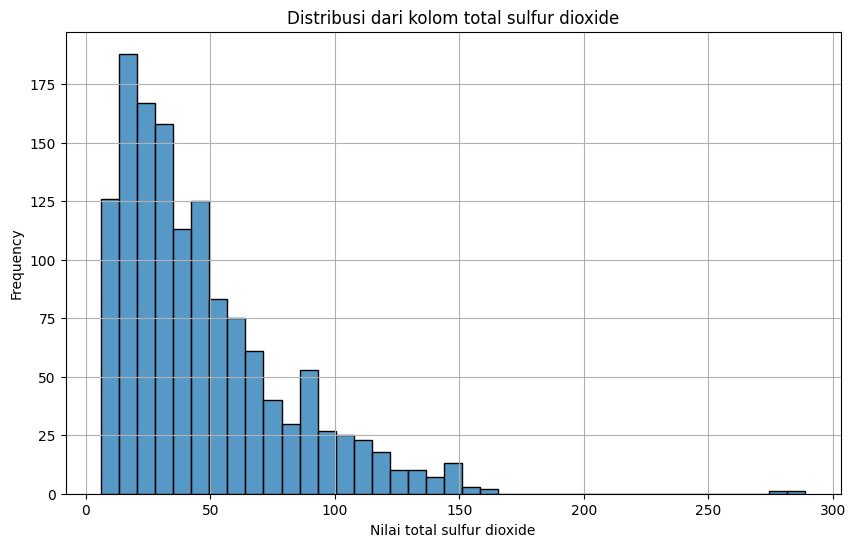

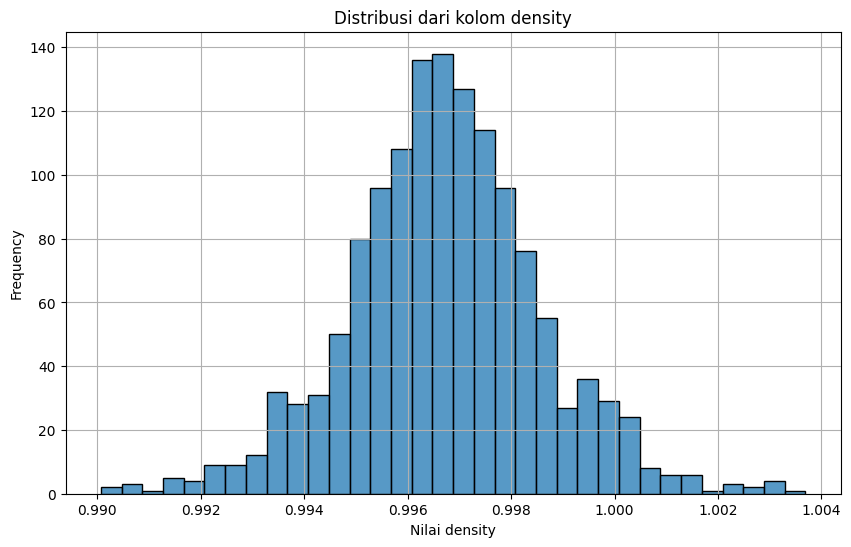

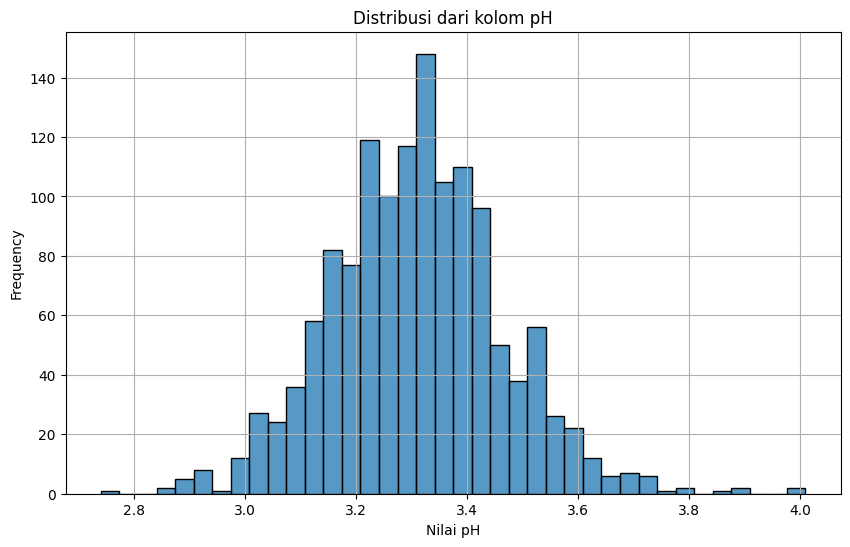

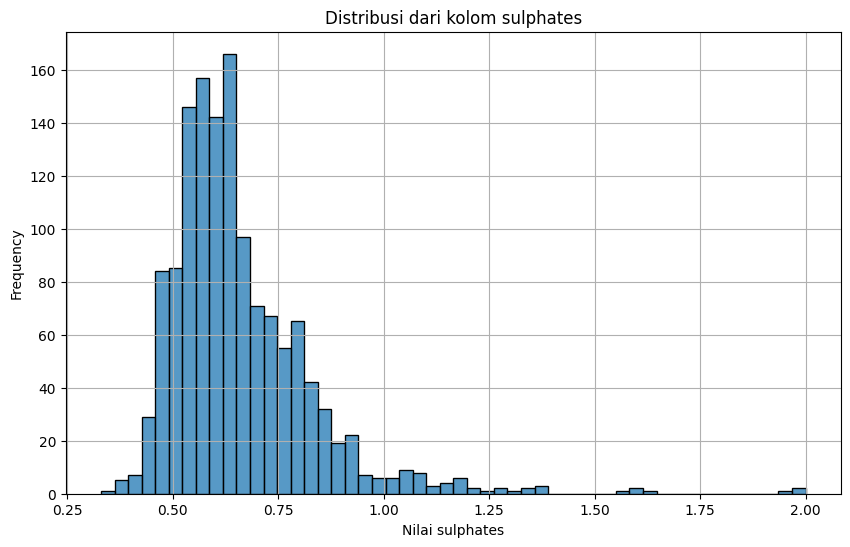

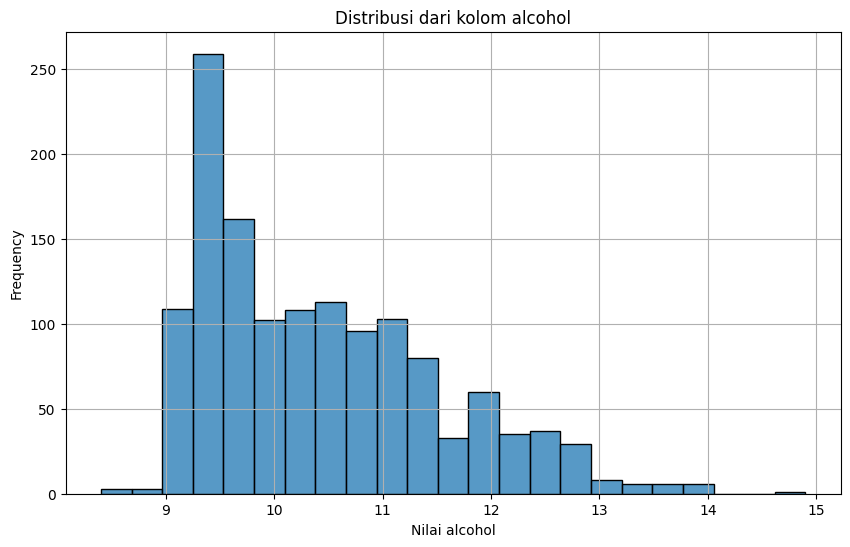

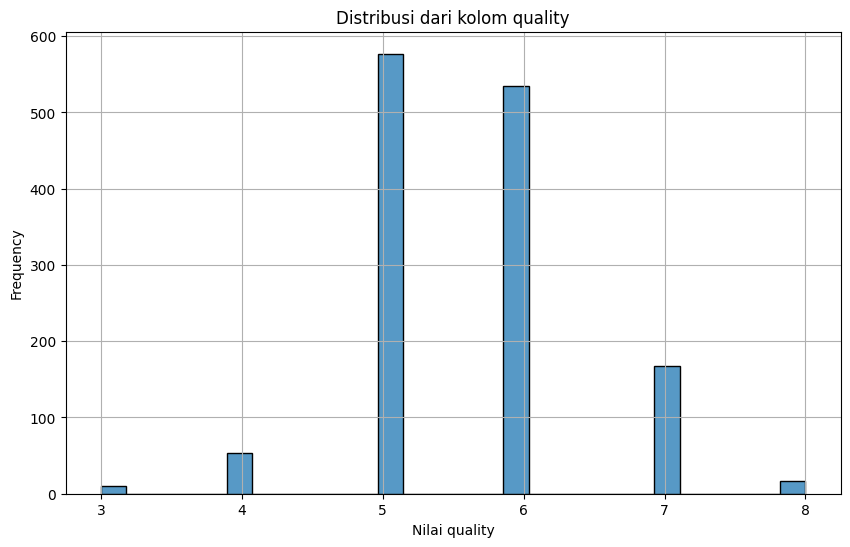

In [ ]:
# Melihat distribusi kategori
for i in df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=i)
  plt.title(f'Distribusi dari kolom {i}')
  plt.xlabel(f'Nilai {i}')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

<Axes: >

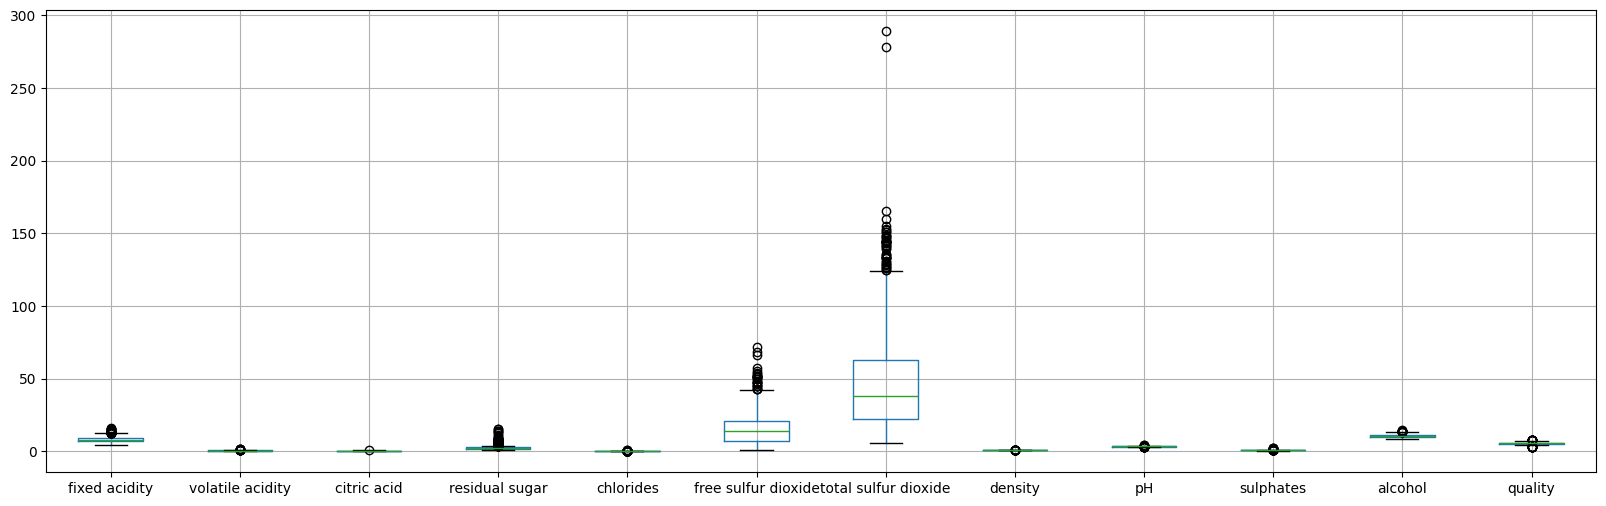

In [ ]:
# Melihat boxplot dari setiap kolom
df.boxplot(figsize=(20,6))

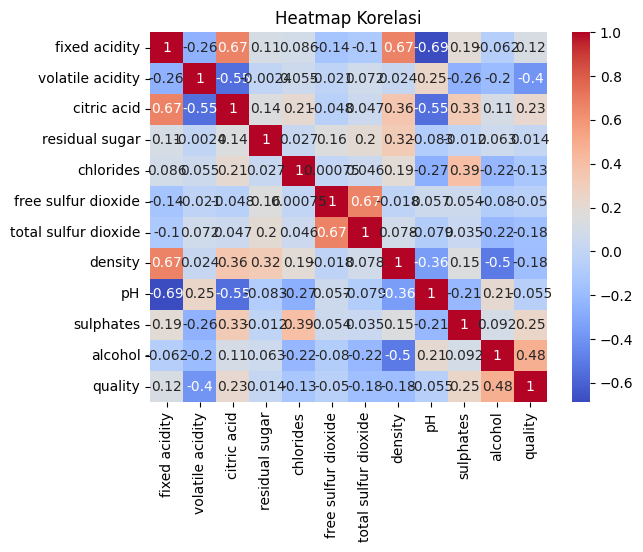

In [ ]:
# Melihat korelasi dengan target
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
# Mengganti score menjadi kategorikal
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(f"Setelah kolom diubah menjadi kategorikal menjadi seperti berikut: ")
display(df['quality'])

Setelah kolom diubah menjadi kategorikal menjadi seperti berikut: 


,quality
0,0
1,0
2,0
3,0
5,0
...,...
1593,0
1594,0
1595,0
1597,0


In [ ]:
df['quality'].value_counts()

,count
quality,
0,1175
1,184


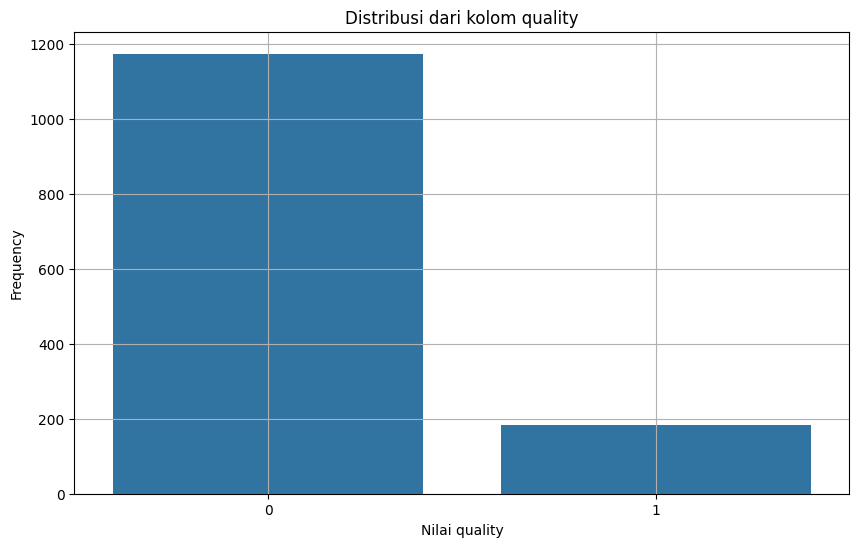

In [ ]:
# Distribusi kolom target setelah diubah
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="quality")
plt.title(f'Distribusi dari kolom quality')
plt.xlabel(f'Nilai quality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Split the data ke fitur (X) dan target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Melihat nilai X dan y
print("Nilai X:")
display(X)

print("Nilai y:")
display(y)

Nilai X:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Nilai y:


,quality
0,0
1,0
2,0
3,0
5,0
...,...
1593,0
1594,0
1595,0
1597,0


In [ ]:
# Hyperparameter Tuning
param_dist = {'n_estimators': [10,50,100,200,500],
              'max_depth': [None,1,5,10,15,20]}

# Membuat random forest classifier
model = RandomForestClassifier(class_weight='balanced')

# Menggunakan grid search untuk mencari hyperparameters terbaik
grid_search = GridSearchCV(model,
                           param_dist,
                           cv=5)

# Fit gridsearch object ke the data
grid_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)
print('Best akurasi dari hyperparameter terbaik:',  grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'n_estimators': 50}
Best akurasi dari hyperparameter terbaik: 0.8822728617934301


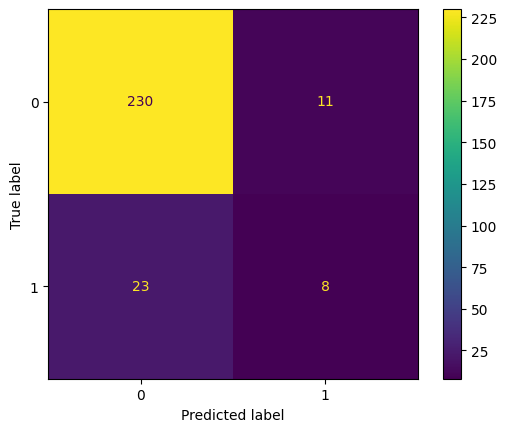

In [ ]:
# Generate prediksi dengan model terbaik
y_pred = best_rf.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Mendapatkan akurasi, precision, dan recall
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.875
Precision: 0.42105263157894735
Recall: 0.25806451612903225


In [ ]:
# Mendapatkan classification report
print("Laporan Klasifikasi adalah sebagai berikut: ")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi adalah sebagai berikut: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       241
           1       0.42      0.26      0.32        31

    accuracy                           0.88       272
   macro avg       0.67      0.61      0.63       272
weighted avg       0.85      0.88      0.86       272



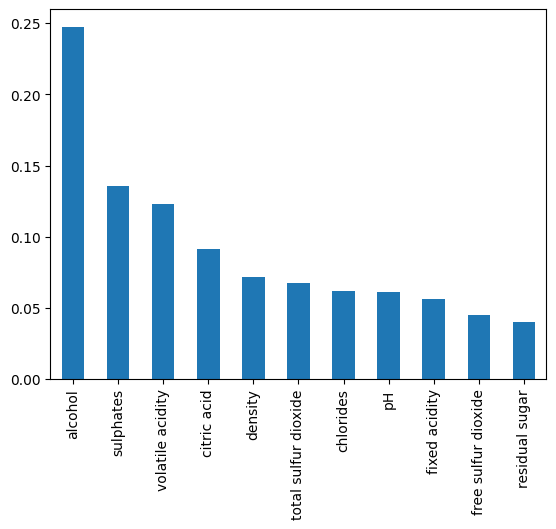

In [ ]:
# Membuat series yang menyimpan feature importance dari model dan feature names dari training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot bar chart
feature_importances.plot.bar();

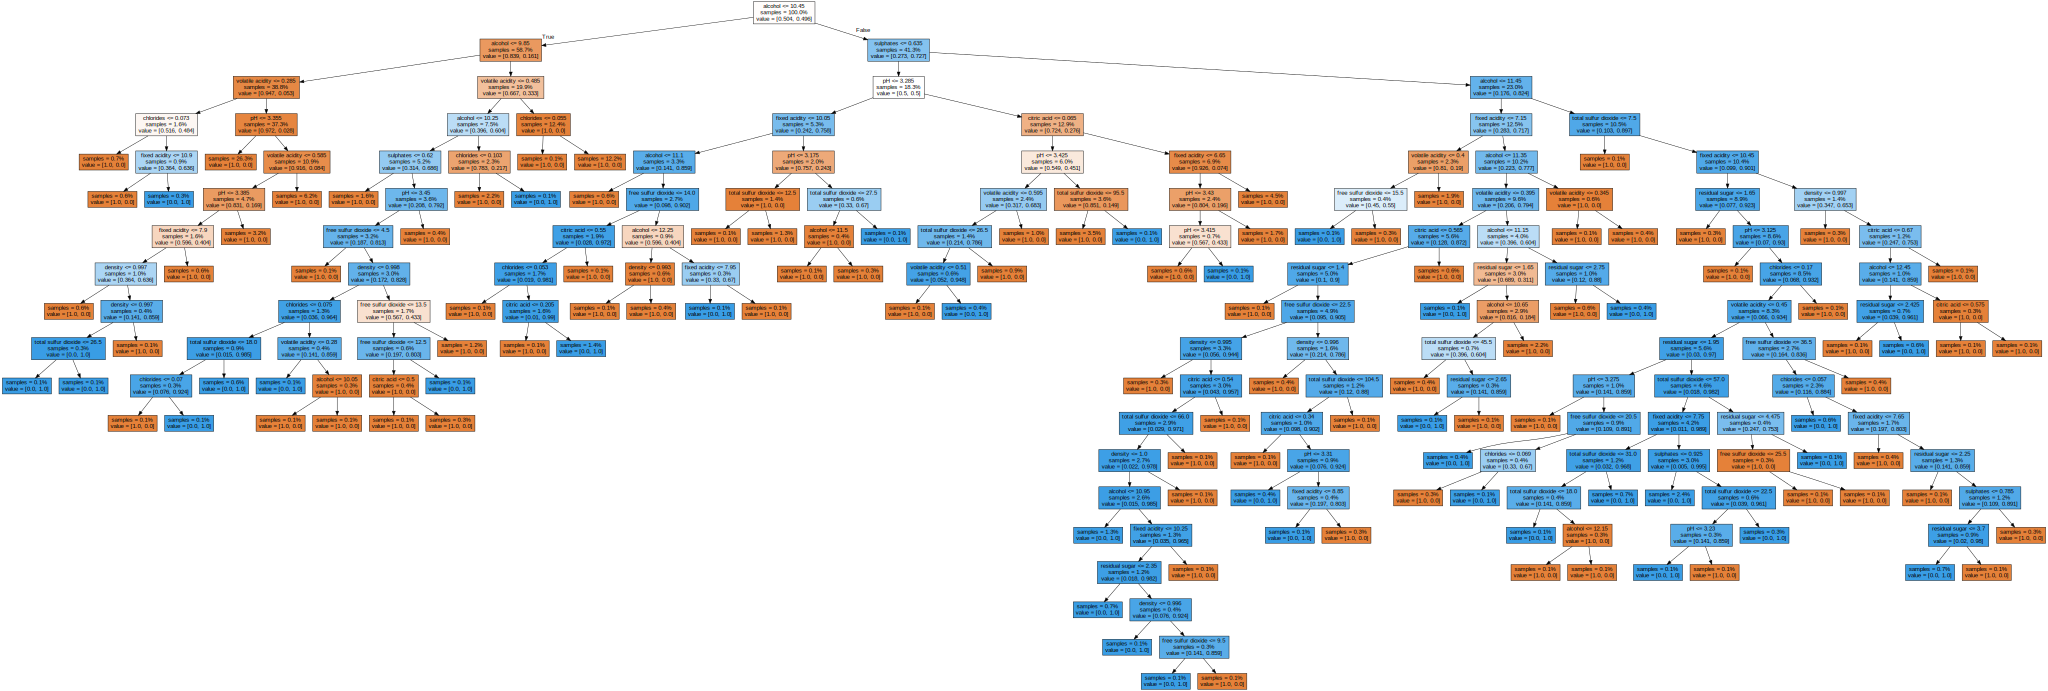

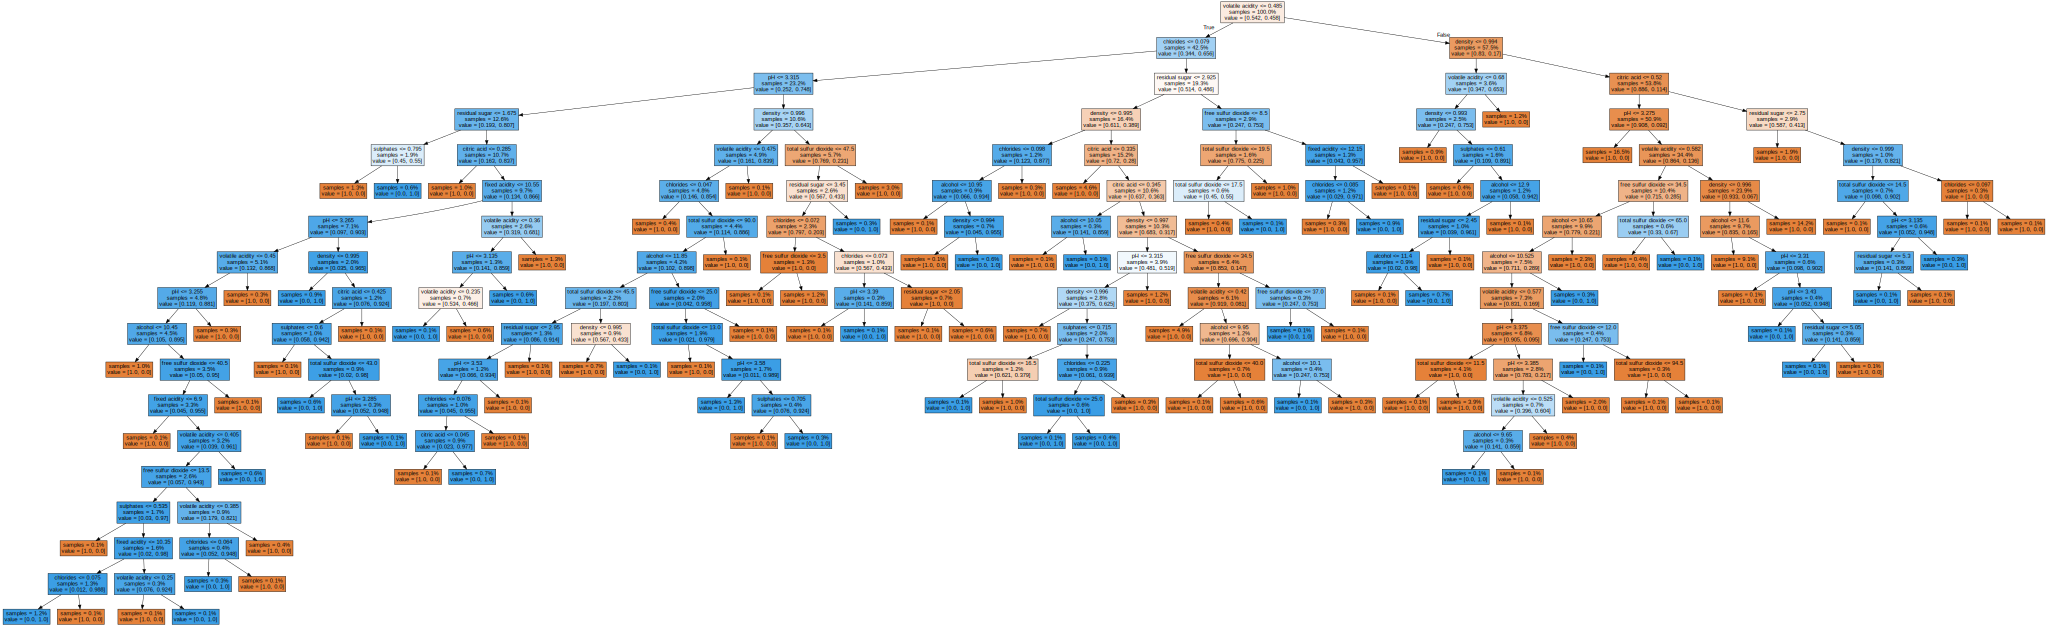

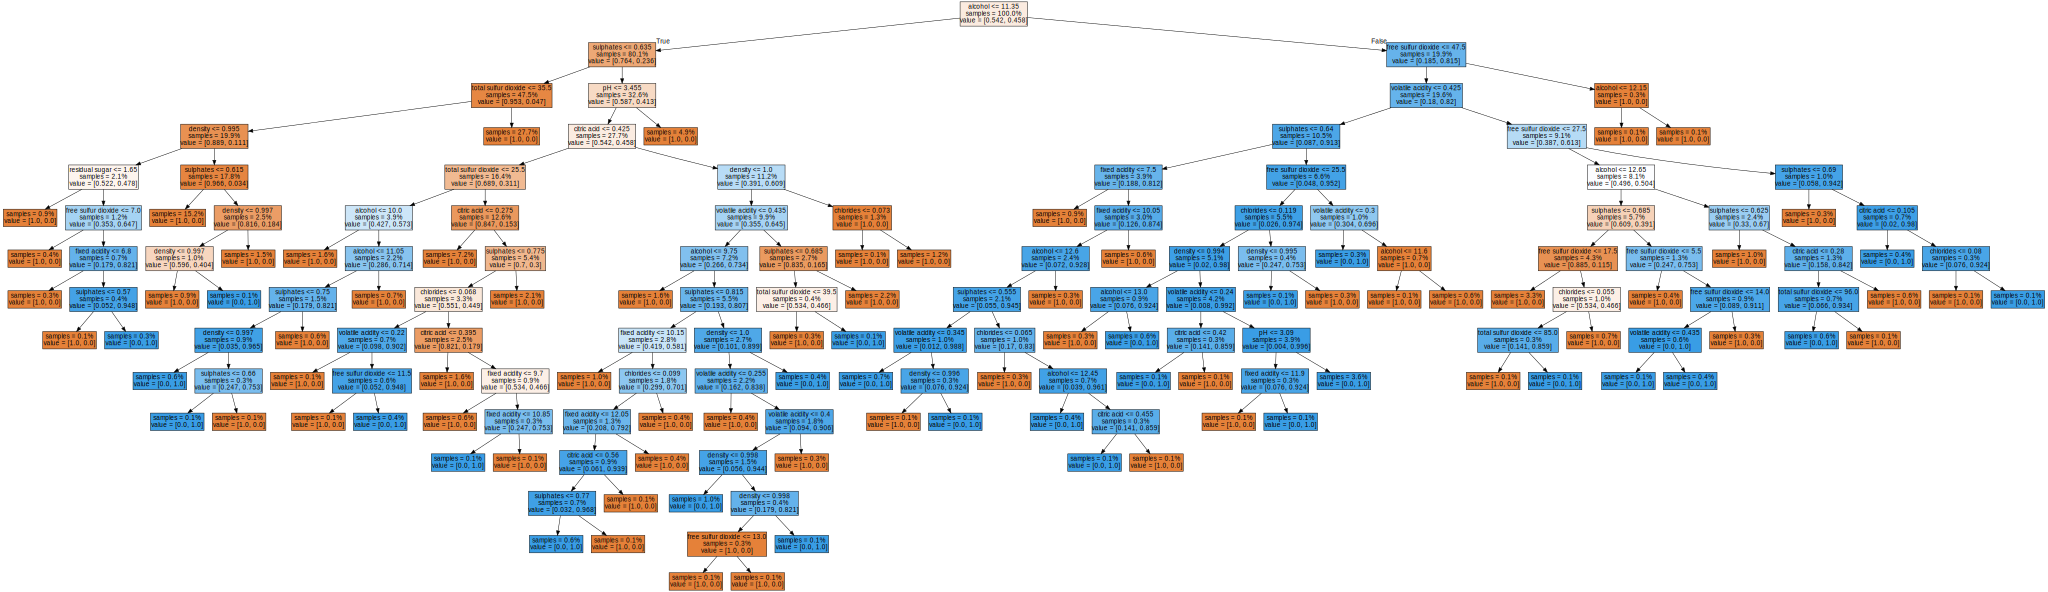

In [ ]:
# Visualisasi hasil dari tree

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=20,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Hasil dari X_test dataframe yang digabung dengan prediksi dan target column yg asli(quality)
final_df = pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True)], axis=1)
final_df['quality_prediction'] = pd.Series(y_pred)

# Print dataframe X_test dengan y_pred dan quality
print(f"Hasil prediksi dari X_test :")
display(final_df)

Hasil prediksi dari X_test :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_prediction
0,7.1,0.530,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,0,0
1,7.2,0.350,0.26,1.8,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,0,0
2,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,1,1
3,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,0,0
4,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,0,0
268,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,0,0
269,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0,0
270,7.6,0.460,0.11,2.6,0.079,12.0,49.0,0.99680,3.21,0.57,10.0,0,0


In [ ]:
# Simulasi prediksi
def simulasi():
  # Dictionary
  dfc = {}

  # Label asli
  label_string = {0:"bad", 1:"good"}

  # Mendapatkan nilai data
  for i in [i for i in df.columns if i != 'quality']:
    dfc[i] = input(f"Masukan {i} : ")
  df_sim = pd.DataFrame([dfc])

  # Prediksi
  X_sim = df_sim
  # y_sim = df_sim['quality']
  prediksi = best_rf.predict(X_sim)

  # Print Hasil
  print(f"\nHasil prediksi adalah : {prediksi[0]} / {label_string[prediksi[0]]}")
  # print(f"Hasil asli adalah : {int(y_sim.item())} / {label_string[int(y_sim.item())]}")

simulasi()

Masukan fixed acidity : 1
Masukan volatile acidity : 0.4
Masukan citric acid : 0.5
Masukan residual sugar : 0.6
Masukan chlorides : 0.2
Masukan free sulfur dioxide : 03.
Masukan total sulfur dioxide : 0.7
Masukan density : 0.3
Masukan pH : 0.5
Masukan sulphates : 0.6
Masukan alcohol : 0.1

Hasil prediksi adalah : 0 / bad
